In [1]:
import yfinance as yf
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
eth_ticker = yf.Ticker("ETH-USD")
csv_file = "eth.csv"

# Check if the CSV file exists and delete it if it does
if os.path.exists(csv_file):
    os.remove(csv_file)

# Fetch the historical data for Ethereum
eth = eth_ticker.history(period="max")
eth.to_csv(csv_file)

# Load the data from the CSV file into a DataFrame
eth = pd.read_csv(csv_file, index_col=0)
eth

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984,0.0,0.0
2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984,0.0,0.0
2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,842300992,0.0,0.0
2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,1613479936,0.0,0.0
2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-15 00:00:00+00:00,3479.785645,3589.887451,3473.452637,3565.549561,12733651076,0.0,0.0
2024-06-16 00:00:00+00:00,3566.761963,3648.093018,3541.534424,3620.563477,9878388158,0.0,0.0
2024-06-17 00:00:00+00:00,3622.383545,3634.285400,3468.148926,3511.378906,17838856988,0.0,0.0


<Axes: xlabel='Date'>

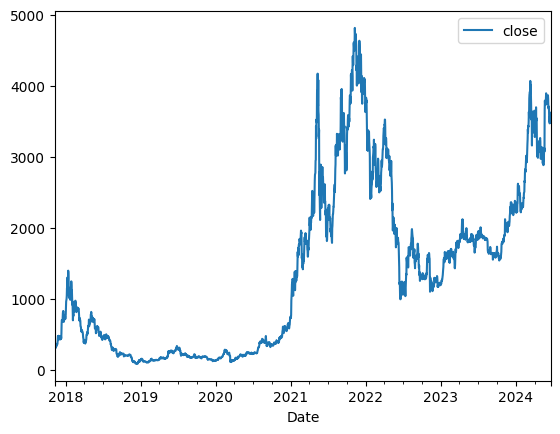

In [3]:
# Convert index to datetime
eth.index = pd.to_datetime(eth.index)

# Remove unnecessary columns
del eth["Dividends"]
del eth["Stock Splits"]

# Convert column names to lowercase
eth.columns = [c.lower() for c in eth.columns]

# Plot the closing price
eth.plot.line(y="close", use_index=True)

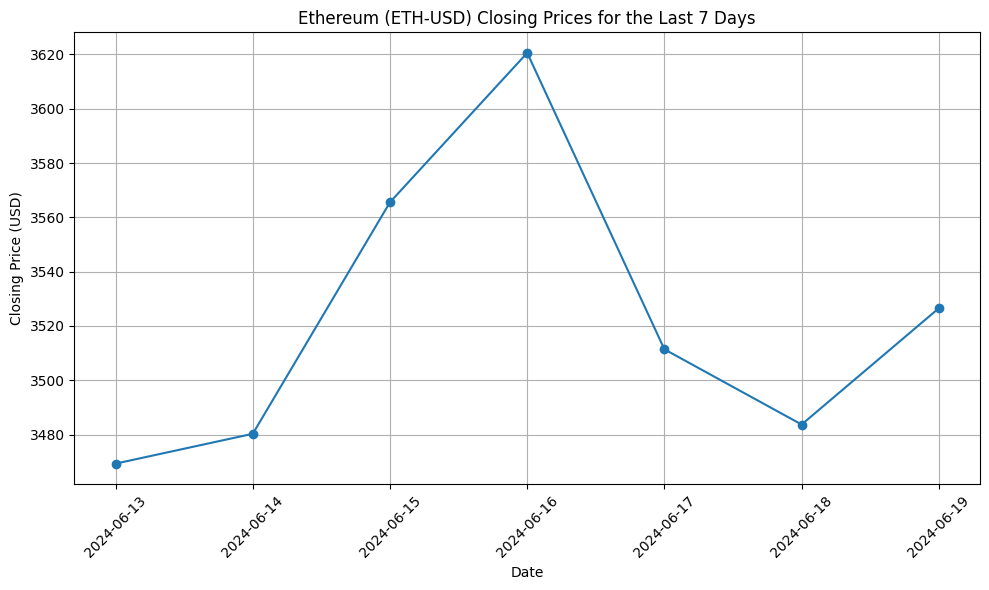

In [4]:
# Filter the data for the last seven days
last_seven_days_eth = eth[-7:]

# Plot the closing price for the last seven days
plt.figure(figsize=(10, 6))
plt.plot(last_seven_days_eth.index, last_seven_days_eth['close'], marker='o')
plt.title('Ethereum (ETH-USD) Closing Prices for the Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
wiki = pd.read_csv("ethereum_sentiment.csv", index_col=0, parse_dates=True)
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.000000,0.000000,0.000000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-06-15,0.533333,0.066103,0.108333
2024-06-16,0.533333,0.066103,0.108333
2024-06-17,0.533333,0.066103,0.108333
2024-06-18,0.533333,0.066103,0.108333


In [6]:
# Assuming 'eth' dataframe has a timezone-aware datetime index
# Localize timezone for 'wiki' dataframe if it's tz-naive
if wiki.index.tz is None:
    wiki.index = wiki.index.tz_localize('UTC')

# Merge the dataframes
eth = eth.merge(wiki, left_index=True, right_index=True)

# Continue with the rest of your code
eth["tomorrow"] = eth["close"].shift(-1)
eth["target"] = (eth["tomorrow"] > eth["close"]).astype(int)
eth["target"].value_counts()


target
1    1238
0    1177
Name: count, dtype: int64

In [7]:
eth

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984,0.900000,-0.144123,0.261111,299.252991,0
2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984,0.966667,-0.177429,0.294444,314.681000,1
2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,842300992,0.966667,-0.177429,0.294444,307.907990,0
2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,1613479936,0.966667,-0.177429,0.294444,316.716003,1
2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984,1.100000,-0.209260,0.327778,337.631012,1
...,...,...,...,...,...,...,...,...,...,...
2024-06-15 00:00:00+00:00,3479.785645,3589.887451,3473.452637,3565.549561,12733651076,0.533333,0.066103,0.108333,3620.563477,1
2024-06-16 00:00:00+00:00,3566.761963,3648.093018,3541.534424,3620.563477,9878388158,0.533333,0.066103,0.108333,3511.378906,0
2024-06-17 00:00:00+00:00,3622.383545,3634.285400,3468.148926,3511.378906,17838856988,0.533333,0.066103,0.108333,3483.681396,0
2024-06-18 00:00:00+00:00,3510.565186,3514.177246,3371.590332,3483.681396,21022514455,0.533333,0.066103,0.108333,3526.514893,1


In [8]:
eth.to_csv('ethSentiment.csv')

In [9]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = eth.iloc[:-200]
test = eth.iloc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [10]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.5432098765432098

In [11]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [12]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [13]:
preds

2023-12-03 00:00:00+00:00    1
2023-12-04 00:00:00+00:00    1
2023-12-05 00:00:00+00:00    1
2023-12-06 00:00:00+00:00    1
2023-12-07 00:00:00+00:00    1
                            ..
2024-06-15 00:00:00+00:00    0
2024-06-16 00:00:00+00:00    0
2024-06-17 00:00:00+00:00    0
2024-06-18 00:00:00+00:00    0
2024-06-19 00:00:00+00:00    0
Length: 200, dtype: int32

In [15]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(eth, model, predictors)

In [16]:
predictions["predictions"].value_counts()

predictions
0    901
1    419
Name: count, dtype: int64

In [18]:
precision_score(predictions["target"], predictions["predictions"])

0.5417661097852029

In [19]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]
        
        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [20]:
eth, new_predictors = compute_rolling(eth.copy())
eth

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984,0.900000,-0.144123,0.261111,299.252991,0,...,NaN,1.000000,0.900000,NaN,1.000000,0.900000,NaN,1.000000,0.900000,NaN
2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984,0.966667,-0.177429,0.294444,314.681000,1,...,0.0,0.965119,0.933333,0.000000,0.965119,0.933333,0.000000,0.965119,0.933333,0.000000
2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,842300992,0.966667,-0.177429,0.294444,307.907990,0,...,0.5,1.009868,0.944444,0.500000,1.009868,0.944444,0.500000,1.009868,0.944444,0.500000
2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,1613479936,0.966667,-0.177429,0.294444,316.716003,1,...,0.5,0.991073,0.950000,0.333333,0.991073,0.950000,0.333333,0.991073,0.950000,0.333333
2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984,1.100000,-0.209260,0.327778,337.631012,1,...,0.5,1.015479,0.980000,0.500000,1.015479,0.980000,0.500000,1.015479,0.980000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-15 00:00:00+00:00,3479.785645,3589.887451,3473.452637,3565.549561,12733651076,0.533333,0.066103,0.108333,3620.563477,1,...,1.0,1.000528,0.533333,0.571429,1.060762,0.240556,0.550000,1.462876,0.185845,0.523288
2024-06-16 00:00:00+00:00,3566.761963,3648.093018,3541.534424,3620.563477,9878388158,0.533333,0.066103,0.108333,3511.378906,0,...,1.0,1.019453,0.533333,0.571429,1.073744,0.246111,0.566667,1.482292,0.187123,0.523288
2024-06-17 00:00:00+00:00,3622.383545,3634.285400,3468.148926,3511.378906,17838856988,0.533333,0.066103,0.108333,3483.681396,0,...,0.5,0.994926,0.533333,0.571429,1.039076,0.252222,0.550000,1.434709,0.188402,0.523288
2024-06-18 00:00:00+00:00,3510.565186,3514.177246,3371.590332,3483.681396,21022514455,0.533333,0.066103,0.108333,3526.514893,1,...,0.0,0.987664,0.533333,0.571429,1.028727,0.258333,0.550000,1.420616,0.189589,0.520548


In [21]:
predictions = backtest(eth, model, new_predictors)
precision_score(predictions["target"], predictions["predictions"])

0.5115894039735099

In [22]:
predictions

,target,predictions
2020-11-08 00:00:00+00:00,0,1
2020-11-09 00:00:00+00:00,1,1
2020-11-10 00:00:00+00:00,1,1
2020-11-11 00:00:00+00:00,0,1
2020-11-12 00:00:00+00:00,1,1
...,...,...
2024-06-15 00:00:00+00:00,1,0
2024-06-16 00:00:00+00:00,0,0
2024-06-17 00:00:00+00:00,0,1
2024-06-18 00:00:00+00:00,1,0


In [23]:
prob_inc = (predictions["predictions"] == 1).mean()
prob_dec = 1 - prob_inc
print(f"Probability of increase: {prob_inc:.4f}")
print(f"Probability of decrease: {prob_dec:.4f}")

Probability of increase: 0.4576
Probability of decrease: 0.5424


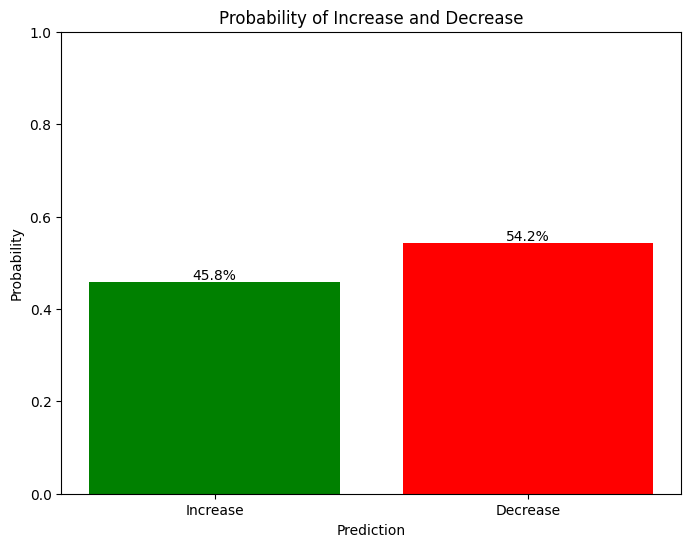

In [24]:
import matplotlib.pyplot as plt

prob_inc_pct = prob_inc * 100
prob_dec_pct = prob_dec * 100

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(["Increase", "Decrease"], [prob_inc, prob_dec], color=['green', 'red'])
plt.xlabel('Prediction')
plt.ylabel('Probability')
plt.title('Probability of Increase and Decrease')

# Display percentages on top of bars
for bar, pct in zip(bars, [prob_inc_pct, prob_dec_pct]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{pct:.1f}%', ha='center', va='bottom')

plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()